## Stacks batch 1 - popgen stats



This notebook contains popgen stats on the genepop file `batch_1.filteredIndivids.filteredMAF_FilteredLoci20p.gen` that have been parsed and visualized. 

Stats include: 

(1) Fis by locus across populations - WITHOUT HWE filter

(2) HWE p-values by locus by population

### (1) Fis, Fst, Fit by locus (across all populations) - WITHOUT Hardy-Weinberg filter

**(1)** Ran option 6 >> 1 in GENEPOP

![genepop](https://github.com/mfisher5/PCod-US-repo/blob/master/analyses/genepop/batch_1_filteredIndivids_home.png?raw=true)


<br>
**(2)** Used Dan's python script to parse genepop output

In [1]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [2]:
cd genepop

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses/genepop


In [3]:
!head parseGenepopINFandFST.py

################################################################################
#
# parseGenepopINF.py - this is a script used to parse output files created
# by genepop
#
# 2017-March-21
# Daniel Drinan (ddrinan@uw.edu)
#
# population - HWE, He (INF), Ho (INF), Fis_wc (INF), Fis_RH (INF)
################################################################################


In [ ]:
!python parseGenepopINFandFST.py \
-f batch_1_filteredIndivids_filteredMAFfilteredLoci20p.txt.FST \
-o batch_1_FSTgenepop_parsed_output.txt

<br>

**(3) Plot in histogram**

In [4]:
myfile = open("batch_1_FSTgenepop_parsed_output.txt", "r")

count = 0
loci = []
fis = []
fst = []
fit = []

for line in myfile: 
    if count > 1: 
        loci.append(line.strip().split()[0])
        fis.append(float(line.strip().split()[1]))
        fst.append(float(line.strip().split()[2]))
        fit.append(float(line.strip().split()[3]))
        count += 1
    else: 
        count += 1

myfile.close()

print "Processed ", count, " loci."

Processed  3849  loci.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

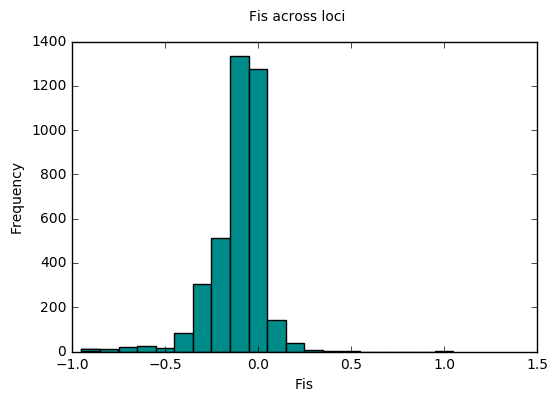

In [6]:
plt.hist(fis, bins = np.arange(-1, 1.1, .1)+0.05, color = "darkcyan")
plt.suptitle("Fis across loci")
plt.xlabel("Fis")
plt.ylabel("Frequency")
plt.show()

In [7]:
plt.close()

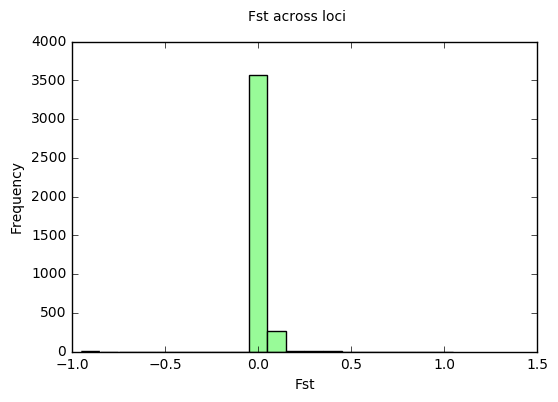

In [8]:
plt.hist(fst, bins = np.arange(-1, 1.1, .1)+0.05, color = "palegreen")
plt.suptitle("Fst across loci")
plt.xlabel("Fst")
plt.ylabel("Frequency")
plt.show()

In [9]:
plt.close()

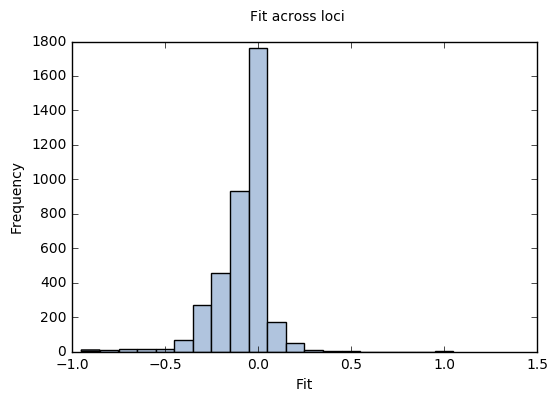

In [10]:
plt.hist(fit, bins = np.arange(-1, 1.1, .1)+0.05, color = "lightsteelblue")
plt.suptitle("Fit across loci")
plt.xlabel("Fit")
plt.ylabel("Frequency")
plt.show()

In [11]:
plt.close()


<br>
### (2)  Heterozygosity across Loci, by population - WITHOUT Hardy-Weinberg Filter



In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/notebooks'

In [2]:
cd ../analyses/genepop

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses/genepop


In [4]:
!python parseGenepopINFandFST.py \
-i ../../stacks_wgenome/batch_1_filteredIndivids_filteredMAFfilteredLoci20p.txt.INF \
-o batch_1_INFgenepop_parsed.txt

In [47]:
infile = open("batch_1_INFgenepop_parsed.txt", "r")

## Create a list of population names found in file above
poplist = []
for line in infile: 
    population = line.strip().split()[0]
    if population not in poplist and population != "pop": 
        poplist.append(population)
infile.close()

In [48]:
print poplist

['KOD03_097', 'AD06_048', 'WC05_048', 'HS04_048', 'PS12_009', 'GS13_017', 'PWS12_133', 'UP03_048']


In [51]:
infile = open("batch_1_INFgenepop_parsed.txt", "r")

## store the observed heterozygosities as a list for each population. 
all_het_list = []
for pop in poplist: 
    temp_het_list = []
    infile = open("batch_1_INFgenepop_parsed.txt", "r")
    for line in infile:
        if line.startswith(pop):
            hobs = line.strip().split()[3]
            temp_het_list.append(float(hobs))
    infile.close()
    print "Processed " + str(len(temp_het_list)) + " in " + pop
    all_het_list.append(temp_het_list)

Processed 3412 in KOD03_097
Processed 3274 in AD06_048
Processed 3239 in WC05_048
Processed 3362 in HS04_048
Processed 3287 in PS12_009
Processed 2568 in GS13_017
Processed 3215 in PWS12_133
Processed 3353 in UP03_048


In [52]:
## Rename populations from default genepop output for graphing below
for i in range(0, len(poplist)-1): 
    poplist[i] = poplist[i].split("_")[0]
    

In [53]:
import numpy as np
import matplotlib.pyplot as plt

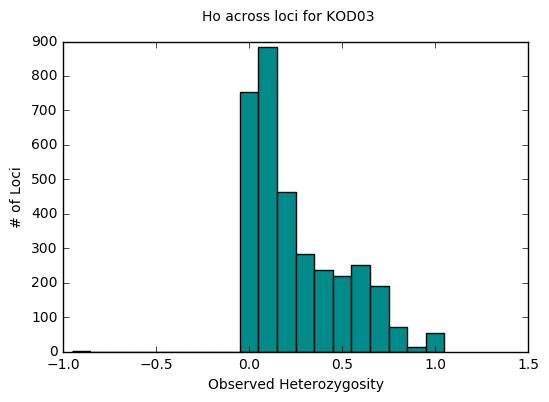

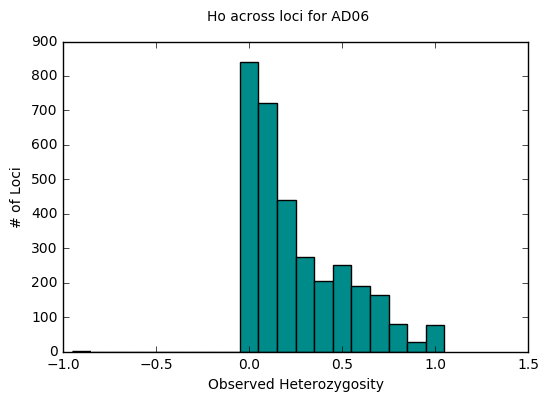

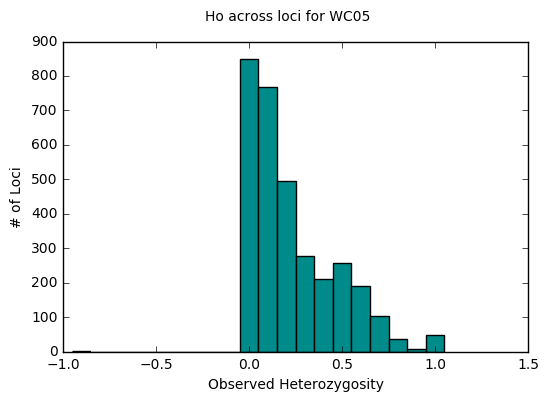

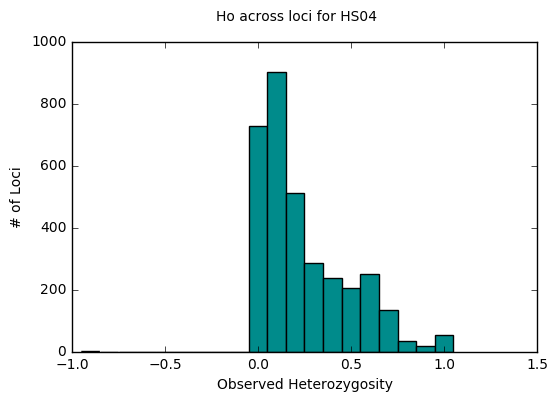

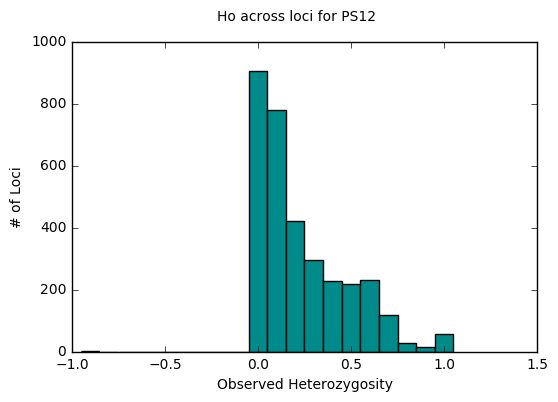

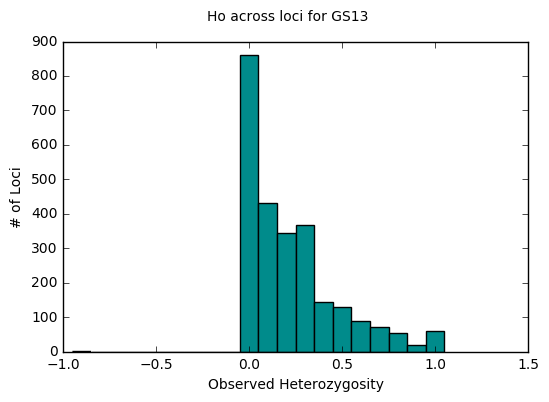

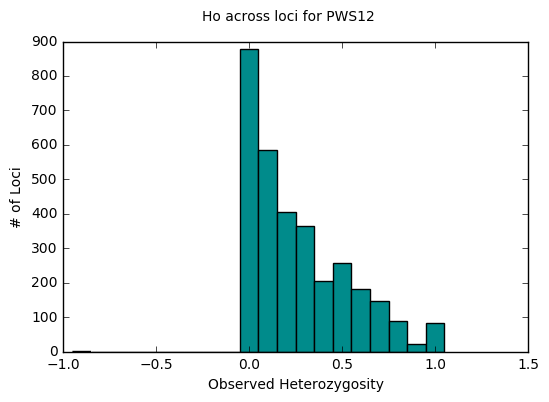

In [54]:
for i in range(0, len(poplist)-1):
    main = "Ho across loci for " + poplist[i]
    pop_het_list = all_het_list[i]
    plt.hist(pop_het_list, bins = np.arange(-1, 1.1, .1)+0.05, color = "darkcyan")
    plt.suptitle(main)
    plt.xlabel("Observed Heterozygosity")
    plt.ylabel("# of Loci")
    plt.show()

In [41]:
pop_het_list = all_het_list[4]

In [42]:
type(pop_het_list)

list

In [45]:
len(all_het_list)

8